# 初始化进行任何实验都需要先运行

## 引入需要的包

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as pyplot
from IPython.display import clear_output
import time
import PowerSensor as ps

## 初始化对象

In [2]:
# 这个对象用于操作摄像头
cam1 = ps.ImageSensor()
# 这个对象用于操作串口
s1 = ps.UsartPort()

***

# 摄像头读取和显示测试

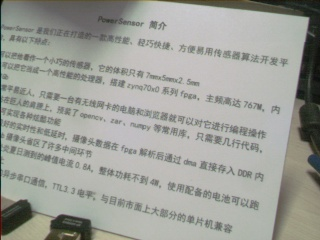

0.0504450798035


In [4]:
for i in range(100):
    # 记录时间
    start = time.time()
    # 清空显示区
    clear_output(wait=True)
    # 读取图像
    imgMat = cam1.read_img_ori()
#     imgMat_cali = grey_world2(imgMat)
    # 图像缩放，太大的图像显示非常浪费资源
    tempImg = cv2.resize(imgMat, (320,240))
#     tempImg = imgMat
    # 显示图像
    img = ps.CommonFunction.show_img_jupyter(tempImg)
    # 记录运行时间
    end = time.time()
    # 打印运行时间
    print(end - start)
    # 因为网络传输的延时，需要稍息一下
    time.sleep(0.01)

In [20]:
r = imgMat[:, :, 0][0]

---
# openCV 测试-轮廓求取

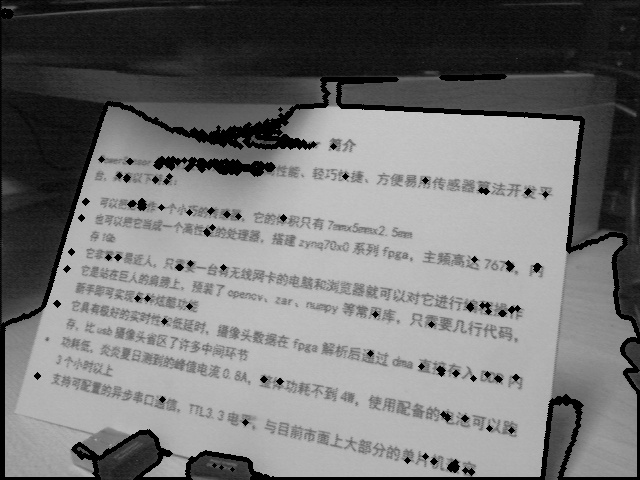

0.142229795456


In [5]:
for i in range(100):
    # 记录时间
    start = time.time()
    # 读取图像
    imgMat = cam1.read_img_ori()
    # 灰度化
    gray = cv2.cvtColor(imgMat, cv2.COLOR_BGR2GRAY)

    # 尺寸变换
   # tempImg = cv2.resize(r, (160,120))
    
    # 查找轮廓
    # 二值化图像
    ret, binary = cv2.threshold(gray,100,255,cv2.THRESH_BINARY)
    # 求取轮廓
    im2, contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # 画轮廓
    img3 = cv2.drawContours(gray, contours, -1,(0,128,128), 3)
    
    
    #显示图像
    clear_output(wait=True)
    ps.CommonFunction.show_img_jupyter(img3)
    
    #计算时间
    end = time.time()
    print(end - start)
#     time.sleep(0.1)

---
# 串口测试

## 字符串打印，上位机读取常用的方式

In [5]:
# 设置波特率，只需要设置一次，默认为115200
s1.set_baudrate(115200)
for i in range(2):
    s1.u_print('hello world!\n')

## 输出字节数组，单片机读取常用的方式

In [8]:
# 设置波特率，只需要设置一次，默认为115200
s1.set_baudrate(9600)
for i in range(2):
    s1.u_send_bytes([1, 3, 5, 7, 9])

---
#  视频保存测试

In [9]:
# 指定编码方式
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
# 设置保存的文件名，图像的格式
out1 = cv2.VideoWriter('output3.avi',fourcc, 20.0, (320,240))

# while(True):
# 保存的帧数
for i in range(200):
    start = time.time()
#     clear_output(wait=True)
    imgMat = cam1.read_img_ori()
    # 缩放图像，以减小保存的文件体积
    tempImg = cv2.resize(imgMat, (320,240))
    out1.write(tempImg)
#     ps.CommonFunction.show_img_jupyter(tempImg)
    #显示图像
#     display(img)
    end = time.time()
    print(i, end - start)
    time.sleep(0.1)
out1.release()

(0, 0.04307818412780762)
(1, 0.019251108169555664)
(2, 0.019633054733276367)
(3, 0.019279956817626953)
(4, 0.019633054733276367)
(5, 0.019151926040649414)
(6, 0.020253896713256836)
(7, 0.01966404914855957)
(8, 0.019744157791137695)
(9, 0.019496917724609375)
(10, 0.01956009864807129)
(11, 0.019057035446166992)
(12, 0.020486116409301758)
(13, 0.019172191619873047)
(14, 0.019897937774658203)
(15, 0.019191980361938477)
(16, 0.019309043884277344)
(17, 0.019526958465576172)
(18, 0.01933121681213379)
(19, 0.01964402198791504)
(20, 0.020047903060913086)
(21, 0.01912999153137207)
(22, 0.020560026168823242)
(23, 0.02292013168334961)
(24, 0.019706010818481445)
(25, 0.01936483383178711)
(26, 0.019279003143310547)
(27, 0.019478797912597656)
(28, 0.019366979598999023)
(29, 0.019567012786865234)
(30, 0.019289016723632812)
(31, 0.01912689208984375)
(32, 0.019840002059936523)
(33, 0.01908087730407715)
(34, 0.019620895385742188)
(35, 0.019224166870117188)
(36, 0.01939105987548828)
(37, 0.019799947738647

# led灯闪烁控制

led灯的闪烁控制非常简单通过调用ps.CommonFunction.led_spark(flag)即可，flag是标志，0代表常亮；1代表单闪；2代表双闪；

In [3]:
ps.CommonFunction.led_spark(2)

DEBUG:gpio:Write 1021: 1
DEBUG:gpio:writing: <open file '/sys/class/gpio/gpio1021/value', mode 'w+' at 0xa10f6d30>: 1
DEBUG:gpio:Write 1020: 0
DEBUG:gpio:writing: <open file '/sys/class/gpio/gpio1020/value', mode 'w+' at 0xa10f6cd8>: 0


# offline程序试运行

In [2]:
%run offline.py

offline mode start...
0.0199038982391
0.0217280387878
0.0216770172119
0.0204129219055
0.0203680992126
0.020320892334
0.0207540988922
0.0217711925507
0.021399974823
0.021320104599
0.0225820541382
0.0217878818512
0.0216829776764
0.0216100215912
0.0212619304657
0.0239768028259
0.0242850780487
0.0224239826202
0.0260529518127
0.0252890586853
0.022989988327
0.0220289230347
0.022775888443
0.0227248668671
0.0228950977325
0.0224859714508
0.0229239463806
0.025799036026
0.0202341079712
0.020024061203
0.0209109783173
0.0208389759064
0.0208220481873
0.0202150344849
0.0233991146088
0.0233480930328
0.0268108844757
0.0250861644745
0.0222909450531
0.0222890377045
0.0226237773895
0.0222728252411
0.0227560997009
0.0218439102173
0.0251979827881
0.0258159637451
0.0213239192963
0.0204379558563
0.0196499824524
0.0204019546509
0.0204861164093
0.0216319561005
0.0209631919861
0.0202579498291
0.0211789608002
0.0286550521851
0.0201258659363
0.0195460319519
0.0198078155518
0.0198068618774
0.0205829143524
0.0205111

KeyboardInterrupt: 